## Coding up a Perceptron

In [ ]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Complete the `Perceptron` class.**

In [ ]:
class Perceptron:
    def __init__(self, epochs=3):
        """
        Args:
            epochs: number of training epochs
        """
        self.epochs = epochs
        self.misclassifications = 0
        ## Add any other variables you need here
        self.weights = np.random.rand(1,2)
        self.weights = self.weights * 0
        self.learning_rate = 0.075

    def calculate_error(self, true_label, prediction):
      #Mean Square Error
      return 0.5 * ((true_label - prediction)**2)

    def derivative_error_wrt_output(self, true_label, prediction):
      return -1*(true_label-prediction)

    def derivative_dotP_wrt_weights(self, feature):
      return feature[0:2]
            
    def sigmoid(self, input):
      return 1 / (1 + math.exp(-input))

    def tanh(self, input):
      return (math.exp(input)-math.exp(-input))/(math.exp(input)+math.exp(-input))
    
    def derivative_tanh(self, output):
      return 1-output**2

    def derivative_sigmoid(self, output):
      return output * (1-output)
        
    def calculate_deltas(self, feature, prediction, true_label):
      #2 calculate error
      error = self.calculate_error(feature[-1], prediction)
      #3 derivative of error WRT output
      error_WRT_output = self.derivative_error_wrt_output(true_label, prediction)
      #4 derivative of activation function
      activation_derivative = self.derivative_tanh(prediction)
      #5 derivative of dot product WRT each weight
      gradients = self.derivative_dotP_wrt_weights(feature)
      #6 put everything together to get your deltas
      deltas = error_WRT_output * activation_derivative * self.learning_rate * gradients

      print(deltas.shape)
      return deltas

    def update_weights(self, deltas):
        """
        The weight update rule. Iterates over each weight and updates it.
        Increments self.misclassifications by 1 if there is a misclassification.

        Args:
            features: Dependent variables (x)
            true_label: Target variable (y)
        """
        self.weights = np.subtract(self.weights, deltas)

    def train(self, features, true_labels, plotting=True):
        """
        features: dependent variables (x)
        true_labels: target variables (y)
        plotting: plot the decision boundary (True by default)
        """
        # Initialize the weights

        # For each epoch
        for epoch in range(self.epochs):
            # Iterate over the training data
            for i in range(len(features)):
                
                if plotting:
                    print("Iteration {}, Misclassifications = {}".
                      format(epoch * len(features) + i+1, self.misclassifications))
                    self.plot_classifier(features, true_labels, features[i])
                
                # Update the weights
                true_label = true_labels[i]
                #1 forward pass
                prediction = self.predict(features[i][0:2])
                print("Prediction: ", prediction)
                print("True Label: ", true_label)
                if round(prediction) != true_label:
                  self.misclassifications = self.misclassifications + 1

                #2 calculate deltas
                deltas = self.calculate_deltas(features[i], prediction, true_label)
                print("Weights: ", self.weights)
                #3 update weights
                self.update_weights(deltas)
                

                
            print("="*25)
            print("Epoch {}, Accuracy = {}".format(epoch + 1, 1 - self.misclassifications/len(features)))
            print("="*25)
            self.misclassifications = 0
    
    def predict(self, features):
        """
        Predict the label using self.weights.
        
        Args:
            features: dependent variables (x)
            
        Returns:
            The predicted label.
        """
        #1 multiply weights vector by the input vector
        input_dot_weights = np.dot(self.weights, features)
        #2 pass through tanh activation function 
        output = self.tanh(input_dot_weights)
        #3 return output

        return output

        
    
    def plot_classifier(self, features, true_labels, data_point):
        """
        Plot the decision boundary.
        
        Args:
            features: dependent variables (x)
            true_labels: target variables (y)
            data_point: the current data point under consideration
        """
        # Create a mesh to plot
        x1_min, x1_max = features[:, 0].min() - 2, features[:, 0].max() + 2
        x2_min, x2_max = features[:, 1].min() - 2, features[:, 1].max() + 2
        x1x1, x2x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                             np.arange(x2_min, x2_max, 0.02))
        
        Z = np.zeros(x1x1.shape)
        fig, ax = plt.subplots()
        for i in range(len(x1x1)):
            for j in range(len(x1x1[0])):
                Z[i,j] = self.predict([x1x1[i,j], x2x2[i,j]])

        # Put the result into a color plot
        ax.contourf(x1x1, x2x2, Z, cmap='bwr', alpha=0.3)

        # Plot the training points
        plt.scatter(features[:, 0], features[:, 1], c=true_labels, cmap='bwr')
        plt.plot(data_point[0], data_point[1], color='k', marker='x', markersize=12)

        ax.set_title('Perceptron')

        plt.show()

**Below is a linearly separable toy dataset.**

In [ ]:
data = np.array([[2.7810836,2.550537003,-1],
        [1.465489372,2.362125076,-1],
        [3.396561688,4.400293529,-1],
        [1.38807019,1.850220317,-1],
        [3.06407232,3.005305973,-1],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]])
'''Normalize and shuffle dataset'''
#norm = np.max(data)
#data[:, [0,1]] = data[:, [0,1]]/norm
#np.random.shuffle(data)
print(data)
features = data[:, [0, 1]]
true_labels = data[:, [2]]

[[ 2.7810836   2.550537   -1.        ]
 [ 1.46548937  2.36212508 -1.        ]
 [ 3.39656169  4.40029353 -1.        ]
 [ 1.38807019  1.85022032 -1.        ]
 [ 3.06407232  3.00530597 -1.        ]
 [ 7.62753121  2.75926224  1.        ]
 [ 5.33244125  2.08862677  1.        ]
 [ 6.92259672  1.77106367  1.        ]
 [ 8.67541865 -0.24206865  1.        ]
 [ 7.67375647  3.50856301  1.        ]]


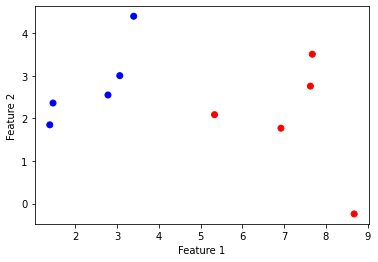

In [ ]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Create a perceptron object.**

In [ ]:
perceptron = Perceptron()


**Train the Perceptron**

0.0
Iteration 1, Misclassifications = 0


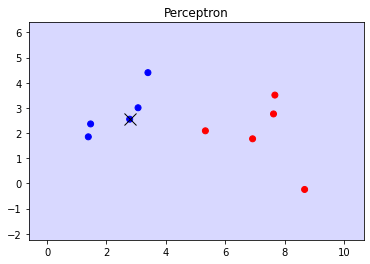

Prediction:  0.0
True Label:  [-1.]
(2,)
Weights:  [[0. 0.]]
Iteration 2, Misclassifications = 1


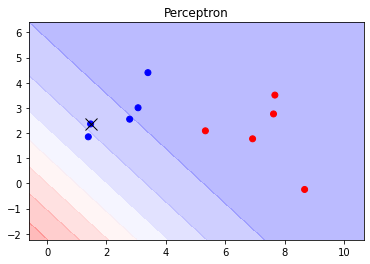

Prediction:  -0.6396169345369722
True Label:  [-1.]
(2,)
Weights:  [[-0.20858127 -0.19129028]]
Iteration 3, Misclassifications = 1


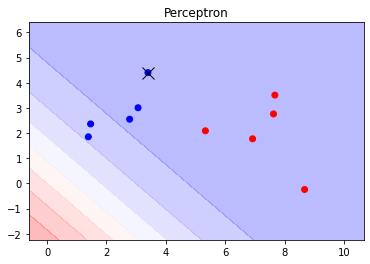

Prediction:  -0.9463582261999497
True Label:  [-1.]
(2,)
Weights:  [[-0.23198662 -0.2290158 ]]
Iteration 4, Misclassifications = 1


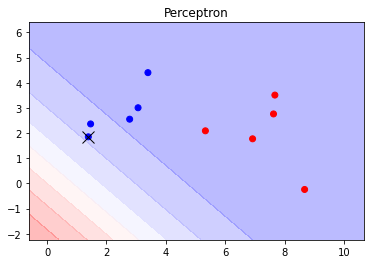

Prediction:  -0.6358306527268061
True Label:  [-1.]
(2,)
Weights:  [[-0.23341331 -0.2308641 ]]
Iteration 5, Misclassifications = 1


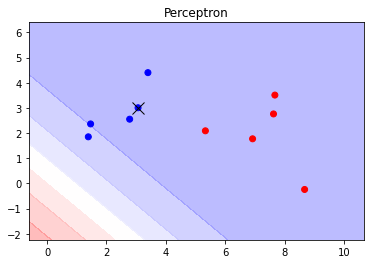

Prediction:  -0.9168166781843464
True Label:  [-1.]
(2,)
Weights:  [[-0.25599819 -0.26096849]]
Iteration 6, Misclassifications = 1


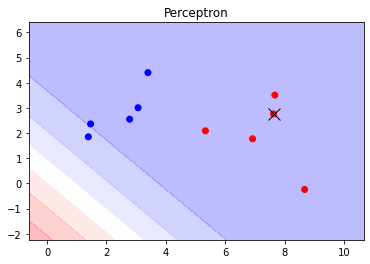

Prediction:  -0.9910825558854575
True Label:  [1.]
(2,)
Weights:  [[-0.25904618 -0.26395802]]
Iteration 7, Misclassifications = 2


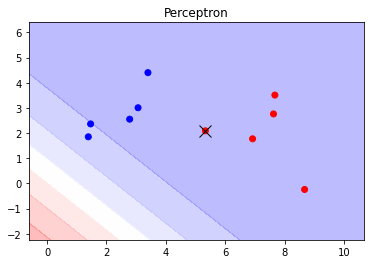

Prediction:  -0.9477846139547446
True Label:  [1.]
(2,)
Weights:  [[-0.23882231 -0.25664203]]
Iteration 8, Misclassifications = 3


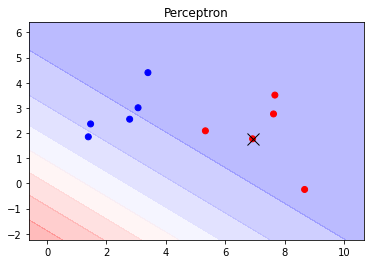

Prediction:  -0.9059386956018913
True Label:  [1.]
(2,)
Weights:  [[-0.15959632 -0.22561055]]
Iteration 9, Misclassifications = 4


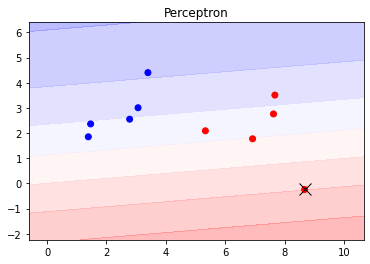

Prediction:  0.19554929315945055
True Label:  [1.]
(2,)
Weights:  [[ 0.01780594 -0.1802243 ]]
Iteration 10, Misclassifications = 5


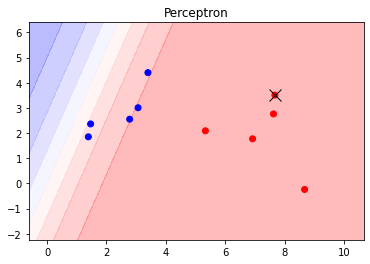

Prediction:  0.9973791149297457
True Label:  [1.]
(2,)
Weights:  [[ 0.52121157 -0.19427074]]
Epoch 1, Accuracy = 0.5
Iteration 11, Misclassifications = 0


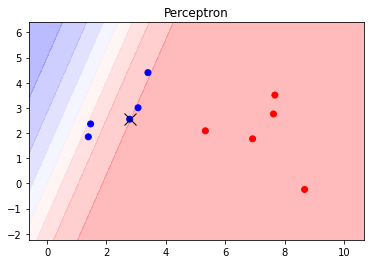

Prediction:  0.7416198217310661
True Label:  [-1.]
(2,)
Weights:  [[ 0.52121947 -0.19426713]]
Iteration 12, Misclassifications = 1


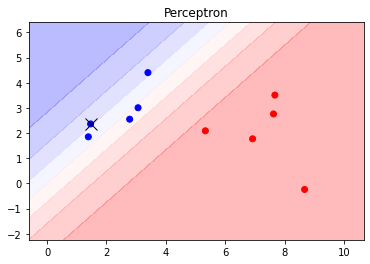

Prediction:  -0.28097111944190956
True Label:  [-1.]
(2,)
Weights:  [[ 0.35774828 -0.34418686]]
Iteration 13, Misclassifications = 2


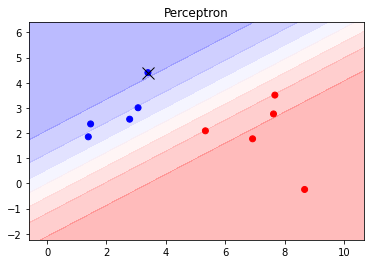

Prediction:  -0.7867782453080986
True Label:  [-1.]
(2,)
Weights:  [[ 0.28495757 -0.46151337]]
Iteration 14, Misclassifications = 2


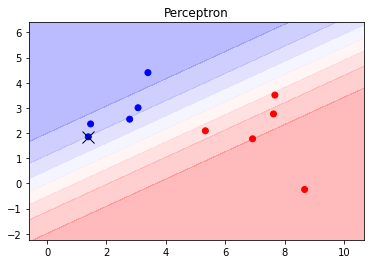

Prediction:  -0.4904756542561973
True Label:  [-1.]
(2,)
Weights:  [[ 0.26426405 -0.48832213]]
Iteration 15, Misclassifications = 3


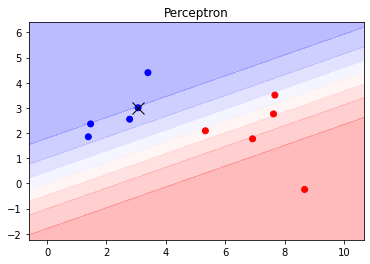

Prediction:  -0.7364314135475988
True Label:  [-1.]
(2,)
Weights:  [[ 0.22398052 -0.54201782]]
Iteration 16, Misclassifications = 3


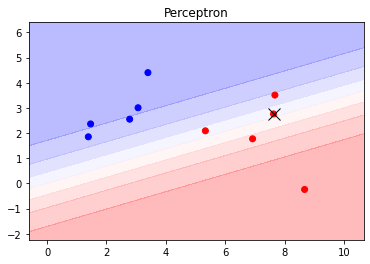

Prediction:  -0.0734810495314767
True Label:  [1.]
(2,)
Weights:  [[ 0.19625976 -0.56920693]]
Iteration 17, Misclassifications = 4


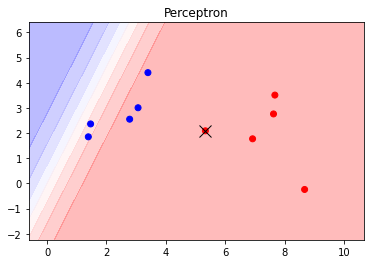

Prediction:  0.9984350824368785
True Label:  [1.]
(2,)
Weights:  [[ 0.80704471 -0.34825524]]
Iteration 18, Misclassifications = 4


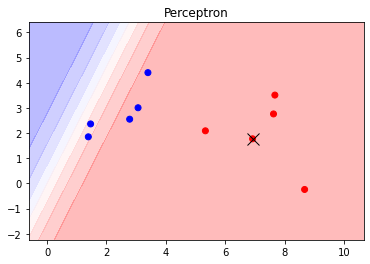

Prediction:  0.9999036050295121
True Label:  [1.]
(2,)
Weights:  [[ 0.80704667 -0.34825448]]
Iteration 19, Misclassifications = 4


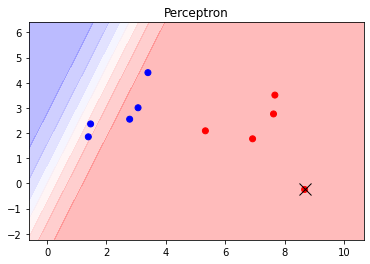

Prediction:  0.9999985990949891
True Label:  [1.]
(2,)
Weights:  [[ 0.80704668 -0.34825448]]
Iteration 20, Misclassifications = 4


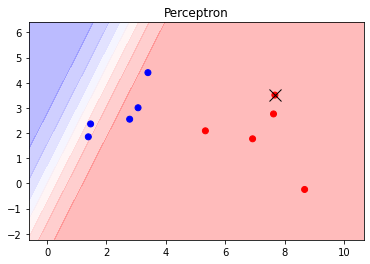

Prediction:  0.9999038224584179
True Label:  [1.]
(2,)
Weights:  [[ 0.80704668 -0.34825448]]
Epoch 2, Accuracy = 0.6
Iteration 21, Misclassifications = 0


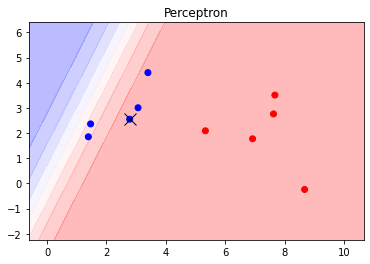

Prediction:  0.8755154026284905
True Label:  [-1.]
(2,)
Weights:  [[ 0.80704669 -0.34825447]]
Iteration 22, Misclassifications = 1


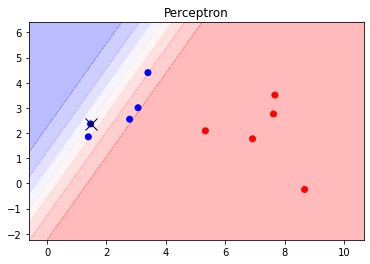

Prediction:  0.028383610911675357
True Label:  [-1.]
(2,)
Weights:  [[ 0.71571275 -0.432017  ]]
Iteration 23, Misclassifications = 2


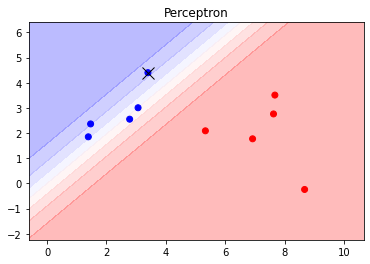

Prediction:  -0.5748133364380481
True Label:  [-1.]
(2,)
Weights:  [[ 0.60277241 -0.61405803]]
Iteration 24, Misclassifications = 2


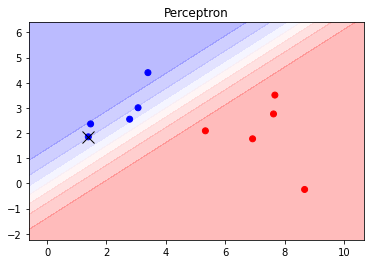

Prediction:  -0.518264748783711
True Label:  [-1.]
(2,)
Weights:  [[ 0.53024718 -0.70801549]]
Iteration 25, Misclassifications = 2


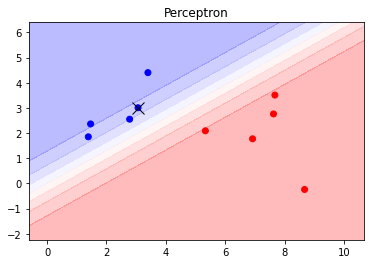

Prediction:  -0.6424995083885349
True Label:  [-1.]
(2,)
Weights:  [[ 0.49356653 -0.75690875]]
Iteration 26, Misclassifications = 2


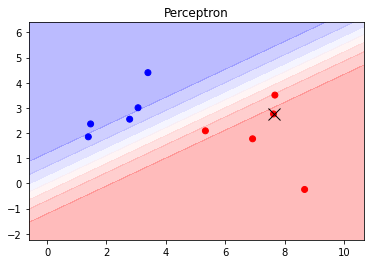

Prediction:  0.8267139454465506
True Label:  [1.]
(2,)
Weights:  [[ 0.44532525 -0.80422481]]
Iteration 27, Misclassifications = 2


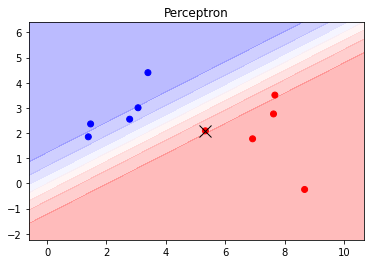

Prediction:  0.7094037093049327
True Label:  [1.]
(2,)
Weights:  [[ 0.47670454 -0.79287334]]
Iteration 28, Misclassifications = 2


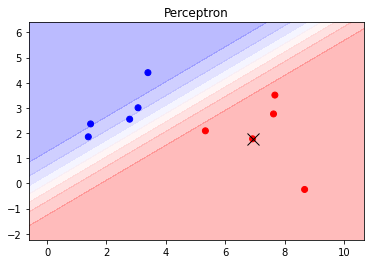

Prediction:  0.9814480202970776
True Label:  [1.]
(2,)
Weights:  [[ 0.53443594 -0.77026093]]
Iteration 29, Misclassifications = 2


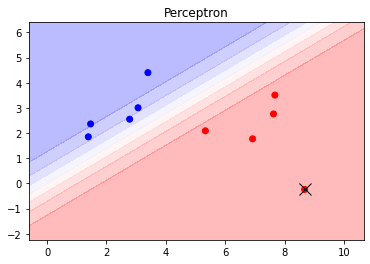

Prediction:  0.9998714046398983
True Label:  [1.]
(2,)
Weights:  [[ 0.53479001 -0.77017034]]
Iteration 30, Misclassifications = 2


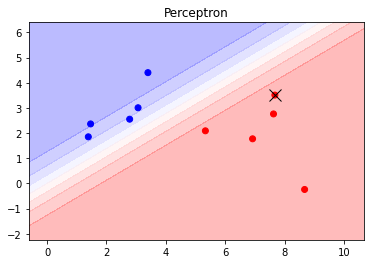

Prediction:  0.8857093553337769
True Label:  [1.]
(2,)
Weights:  [[ 0.53479003 -0.77017034]]
Epoch 3, Accuracy = 0.8


In [ ]:
input = np.array([2.7810836,2.550537003])

out = perceptron.predict(input)
print(out)

perceptron.train(features, true_labels)

In [ ]:
for feature in features:

  out = perceptron.predict(feature)
  print(round(out))

0
-1
-1
-1
-1
1
1
1
1
1
